# Gather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customersegm = pd.read_csv('customersegm.csv', encoding='cp1252')

# Assess

In [3]:
customersegm

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
customersegm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
list(customersegm)

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [6]:
customersegm.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
customersegm.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
customersegm.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1073,10196,35,100.00,3,3564.75,11/26/2003 0:00,Shipped,4,11,2003,...,567 North Pendale Street,NaN,New Haven,CT,97823,USA,NaN,Murphy,Leslie,Medium
185,10419,12,100.00,13,1961.28,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Small
1117,10139,30,100.00,5,3095.40,7/16/2003 0:00,Shipped,3,7,2003,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
813,10210,40,49.67,3,1986.80,1/12/2004 0:00,Shipped,1,1,2004,...,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",NaN,Osaka,Osaka,530-0003,Japan,Japan,Kentary,Mory,Small
277,10230,43,100.00,1,7016.31,3/15/2004 0:00,Shipped,1,3,2004,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Large


In [9]:
customersegm.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Clean

In [10]:
customersegm_clean=customersegm.copy()

In [11]:
customersegm_clean.columns= customersegm_clean.columns.str.lower()
customersegm_clean.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [12]:

customersegm_clean.rename(columns={'priceeach': 'price'}, inplace=True)



# Missing Data

In [13]:
#Recalculatet salese column by multiplying quantityordered by priceeach
customersegm_clean.sales = (customersegm_clean.quantityordered * customersegm_clean.price)

In [14]:
customersegm_clean.sales.head()

0    2871.00
1    2765.90
2    3884.34
3    3746.70
4    4900.00
Name: sales, dtype: float64

In [15]:
customersegm_clean['quarter'] = "Q" + customersegm_clean['qtr_id'].astype(str)


# Drop unnecessary columns
customersegm_clean.drop(columns=['month_id', 'year_id', 'qtr_id'], inplace=True)



In [16]:
customersegm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   price             2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   productline       2823 non-null   object 
 8   msrp              2823 non-null   int64  
 9   productcode       2823 non-null   object 
 10  customername      2823 non-null   object 
 11  phone             2823 non-null   object 
 12  addressline1      2823 non-null   object 
 13  addressline2      302 non-null    object 
 14  city              2823 non-null   object 
 15  state             1337 non-null   object 
 16  postalcode        2747 non-null   object 


In [17]:
customersegm_clean.isnull().sum()

ordernumber            0
quantityordered        0
price                  0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
quarter                0
dtype: int64

In [18]:
#we drop ADDRESSLINE2 because that has a 2521 NANvalue from 2822 and the data in other rows incorrect
customersegm_clean = customersegm_clean.drop('addressline2' , axis=1)
customersegm_clean = customersegm_clean.drop('state' , axis=1)


In [19]:
list(customersegm_clean)

['ordernumber',
 'quantityordered',
 'price',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'city',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize',
 'quarter']

In [20]:
customersegm_clean.territory=customersegm_clean.territory.fillna('')

In [21]:
customersegm_clean.isnull().sum()

ordernumber          0
quantityordered      0
price                0
orderlinenumber      0
sales                0
orderdate            0
status               0
productline          0
msrp                 0
productcode          0
customername         0
phone                0
addressline1         0
city                 0
postalcode          76
country              0
territory            0
contactlastname      0
contactfirstname     0
dealsize             0
quarter              0
dtype: int64

In [22]:
customersegm_clean.head()

,ordernumber,quantityordered,price,orderlinenumber,sales,orderdate,status,productline,msrp,productcode,...,phone,addressline1,city,postalcode,country,territory,contactlastname,contactfirstname,dealsize,quarter
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,,Yu,Kwai,Small,Q1
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,EMEA,Henriot,Paul,Small,Q2
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium,Q3
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,,Young,Julie,Medium,Q3
4,10159,49,100.00,14,4900.00,10/10/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,6505551386,7734 Strong St.,San Francisco,NaN,USA,,Brown,Julie,Medium,Q4


# Quality

In [23]:
customersegm_clean.orderdate

0        2/24/2003 0:00
1         5/7/2003 0:00
2         7/1/2003 0:00
3        8/25/2003 0:00
4       10/10/2003 0:00
             ...       
2818     12/2/2004 0:00
2819     1/31/2005 0:00
2820      3/1/2005 0:00
2821     3/28/2005 0:00
2822      5/6/2005 0:00
Name: orderdate, Length: 2823, dtype: object

In [24]:
#convert orderdate from object to datetime
customersegm_clean.orderdate = pd.to_datetime(customersegm_clean.orderdate)

In [25]:
customersegm_clean.orderdate.head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: orderdate, dtype: datetime64[ns]

In [26]:
customersegm_clean['year'] = customersegm_clean['orderdate'].dt.year

In [27]:
customersegm_clean.productcode

0       S10_1678
1       S10_1678
2       S10_1678
3       S10_1678
4       S10_1678
          ...   
2818    S72_3212
2819    S72_3212
2820    S72_3212
2821    S72_3212
2822    S72_3212
Name: productcode, Length: 2823, dtype: object

In [28]:
#strip S and remove _
customersegm_clean.productcode = customersegm_clean.productcode.str.strip('S').astype(str).str.replace('_','')

In [29]:
customersegm_clean.productcode.sample(5)

226     121666
423     181097
1509    241628
706     182319
1051    183232
Name: productcode, dtype: object

In [30]:
customersegm_clean.phone

0             2125557818
1             26.47.1555
2       +33 1 46 62 7555
3             6265557265
4             6505551386
              ...       
2818      (91) 555 94 44
2819          981-443655
2820      (91) 555 94 44
2821          61.77.6555
2822          6175559555
Name: phone, Length: 2823, dtype: object

In [31]:
#phone number strip "() .+- "
customersegm_clean['Phonenumber'] = customersegm_clean.phone
# use RegeX Expression
customersegm_clean.Phonenumber= customersegm_clean.Phonenumber.str.replace(r'\D+', '', regex=True)
customersegm_clean = customersegm_clean.drop('phone' , axis=1)

In [32]:
customersegm_clean.Phonenumber

0        2125557818
1          26471555
2       33146627555
3        6265557265
4        6505551386
           ...     
2818      915559444
2819      981443655
2820      915559444
2821       61776555
2822     6175559555
Name: Phonenumber, Length: 2823, dtype: object

In [33]:
customersegm_clean.addressline1

0             897 Long Airport Avenue
1                  59 rue de l'Abbaye
2       27 rue du Colonel Pierre Avia
3                  78934 Hillside Dr.
4                     7734 Strong St.
                    ...              
2818               C/ Moralzarzal, 86
2819                      Torikatu 38
2820               C/ Moralzarzal, 86
2821            1 rue Alsace-Lorraine
2822               8616 Spinnaker Dr.
Name: addressline1, Length: 2823, dtype: object

In [34]:
#we will strip C and replace (/ . , )
#we noe have one cloumn about address , we will rename that to address
customersegm_clean.addressline1= customersegm_clean.addressline1.str.strip('C').replace(r'[/,.,,,]',' ', regex=True)
customersegm_clean['Address']=customersegm_clean['addressline1']
customersegm_clean = customersegm_clean.drop('addressline1' , axis=1)

In [35]:
customersegm_clean.Address

0             897 Long Airport Avenue
1                  59 rue de l'Abbaye
2       27 rue du Colonel Pierre Avia
3                  78934 Hillside Dr 
4                     7734 Strong St 
                    ...              
2818                  Moralzarzal  86
2819                      Torikatu 38
2820                  Moralzarzal  86
2821            1 rue Alsace-Lorraine
2822               8616 Spinnaker Dr 
Name: Address, Length: 2823, dtype: object

In [36]:
customersegm_clean['city'].value_counts()

city
Madrid         304
San Rafael     180
NYC            152
Singapore       79
Paris           70
              ... 
Graz            15
Los Angeles     14
Munich          14
Burbank         13
Charleroi        8
Name: count, Length: 73, dtype: int64

In [37]:
customersegm_clean.country = customersegm_clean.country.astype('category')

In [38]:
customersegm_clean.country.value_counts()

country
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [39]:
#convert postalcode to string and remove '-' and letters 
customersegm_clean['postalcode'] = customersegm_clean['postalcode'].replace(r'\D', '', regex=True)
customersegm_clean['postalcode'] = customersegm_clean['postalcode'].replace('0000n', np.nan).astype('string')
customersegm_clean.postalcode = customersegm_clean.postalcode.astype('string')

In [40]:
customersegm_clean.postalcode.sample(5)

1417     2060
1353    97562
1850    97562
809     94217
3       90003
Name: postalcode, dtype: string

In [41]:
customersegm_clean.territory.value_counts()

territory
EMEA     1407
         1074
APAC      221
Japan     121
Name: count, dtype: int64

In [42]:
territory_abbrev_map = {'Japan': 'JP'}
customersegm_clean['territory'] = customersegm_clean['territory'].replace(territory_abbrev_map).astype('category')


In [43]:
customersegm_clean.territory = customersegm_clean.territory.astype('category')

In [44]:
customersegm_clean.territory.value_counts()

territory
EMEA    1407
        1074
APAC     221
JP       121
Name: count, dtype: int64

In [45]:
customersegm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ordernumber       2823 non-null   int64         
 1   quantityordered   2823 non-null   int64         
 2   price             2823 non-null   float64       
 3   orderlinenumber   2823 non-null   int64         
 4   sales             2823 non-null   float64       
 5   orderdate         2823 non-null   datetime64[ns]
 6   status            2823 non-null   object        
 7   productline       2823 non-null   object        
 8   msrp              2823 non-null   int64         
 9   productcode       2823 non-null   object        
 10  customername      2823 non-null   object        
 11  city              2823 non-null   object        
 12  postalcode        2747 non-null   string        
 13  country           2823 non-null   category      
 14  territory         2823 n

In [46]:
customersegm_clean.describe()

,ordernumber,quantityordered,price,orderlinenumber,sales,orderdate,msrp,year
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.00000
mean,10258.725115,35.092809,83.658544,6.466171,2936.906408,2004-05-11 00:16:49.989373056,100.715551,2003.81509
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,33.000000,2003.00000
25%,10180.000000,27.000000,68.860000,3.000000,2100.000000,2003-11-06 12:00:00,68.000000,2003.00000
50%,10262.000000,35.000000,95.700000,6.000000,2800.000000,2004-06-15 00:00:00,99.000000,2004.00000
75%,10333.500000,43.000000,100.000000,9.000000,3726.810000,2004-11-17 12:00:00,124.000000,2004.00000
max,10425.000000,97.000000,100.000000,18.000000,9048.160000,2005-05-31 00:00:00,214.000000,2005.00000
std,92.085478,9.741443,20.174277,4.225841,1105.644284,NaN,40.187912,0.69967


# Visualization

In [47]:
sns.set()

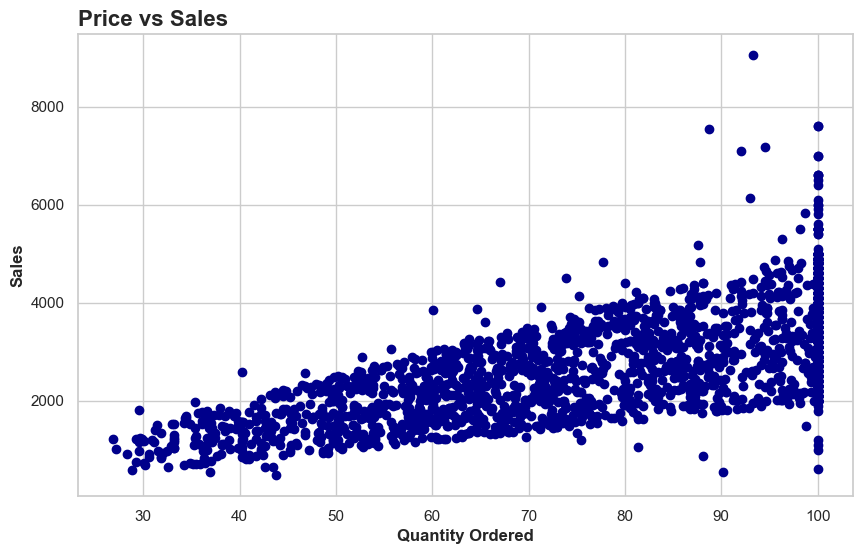

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(customersegm_clean['price'], customersegm_clean['sales'], c="darkblue")

plt.title('Price vs Sales', fontsize=16, weight='bold', loc='left')
plt.xlabel('Quantity Ordered',weight='bold')
plt.ylabel('Sales',weight='bold')
plt.show()

#

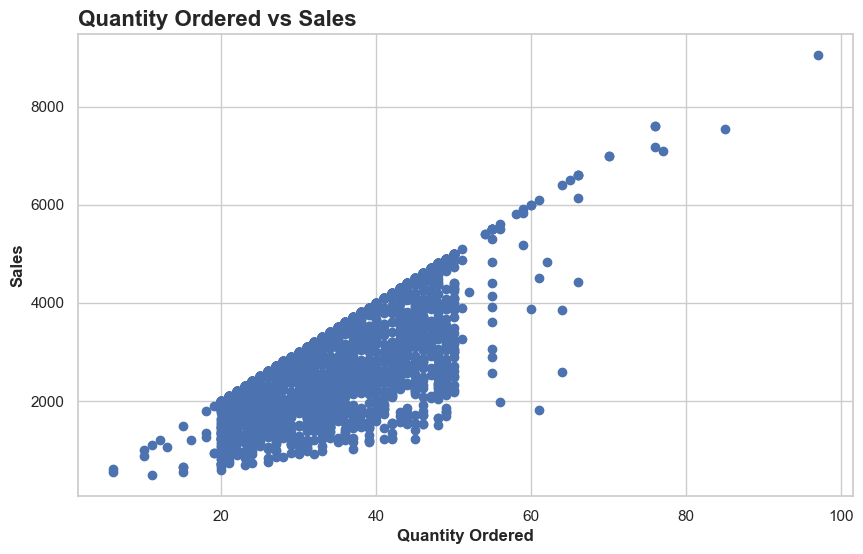

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(customersegm_clean['quantityordered'], customersegm_clean['sales'])

plt.title('Quantity Ordered vs Sales', fontsize=16, weight='bold', loc='left')
plt.xlabel('Quantity Ordered',weight='bold')
plt.ylabel('Sales',weight='bold')
plt.show()

#

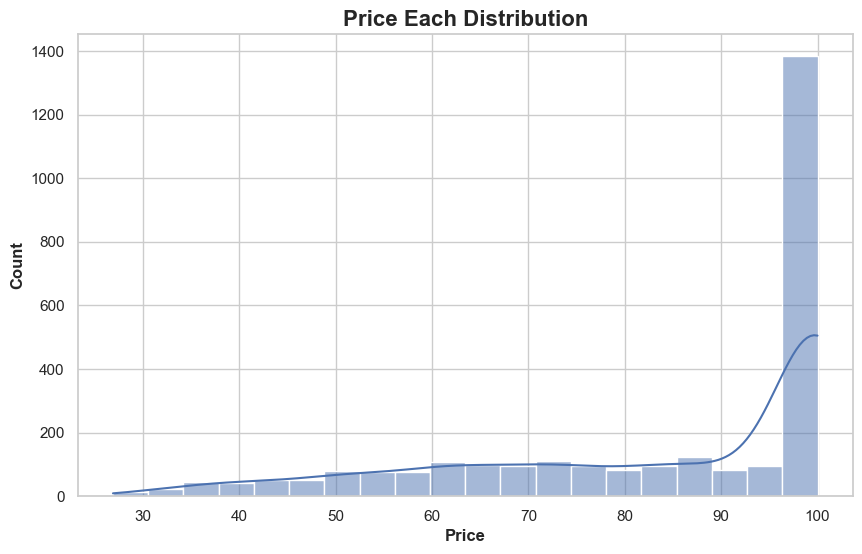

In [50]:
# Distribution plot for 'priceeach'
plt.figure(figsize=(10, 6))
sns.histplot(customersegm_clean['price'], bins=20, kde=True)
plt.title('Price Each Distribution', fontsize=16, weight='bold')
plt.xlabel("Price", weight='bold')
plt.ylabel("Count", weight='bold')
plt.show()

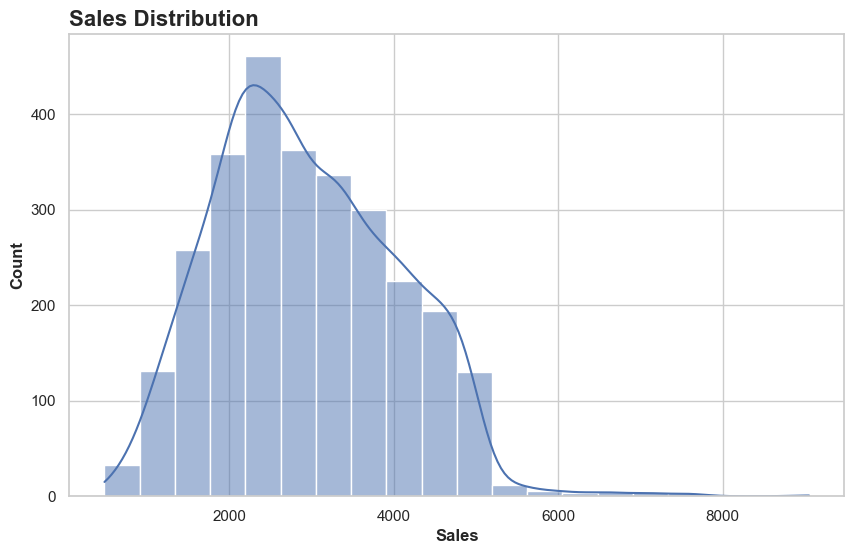

In [51]:
# Distribution plot for 'sales'
plt.figure(figsize=(10, 6))
sns.histplot(customersegm_clean['sales'], bins=20, kde=True)
plt.title('Sales Distribution', fontsize=16, weight='bold', loc='left')
plt.xlabel("Sales", weight='bold')
plt.ylabel("Count", weight='bold')
plt.show()

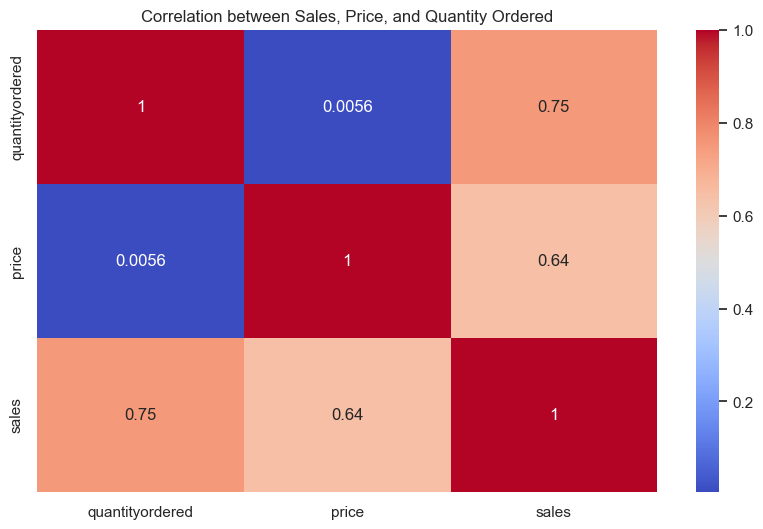

In [52]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customersegm_clean[['quantityordered', 'price', 'sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sales, Price, and Quantity Ordered')
plt.show()


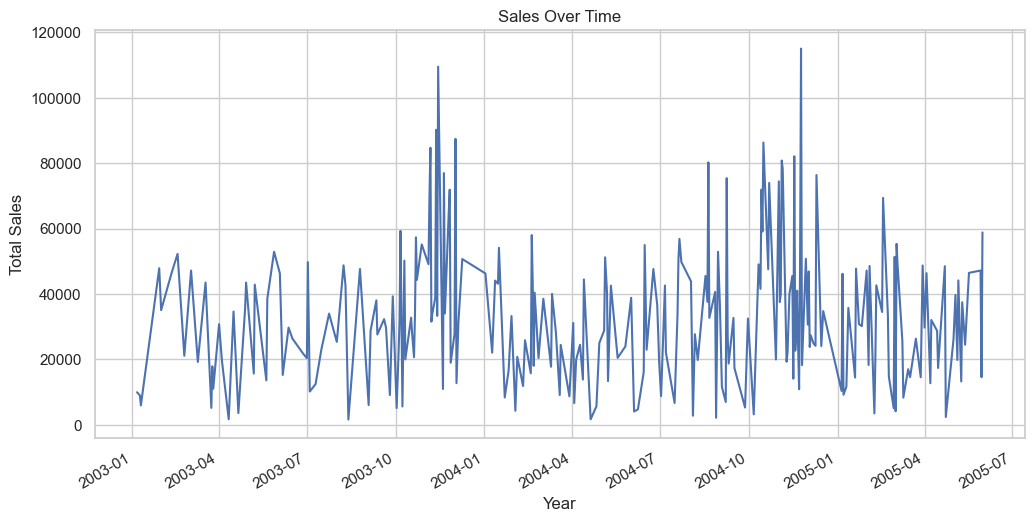

In [53]:
plt.figure(figsize=(12, 6))
customersegm_clean.groupby('orderdate')['sales'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


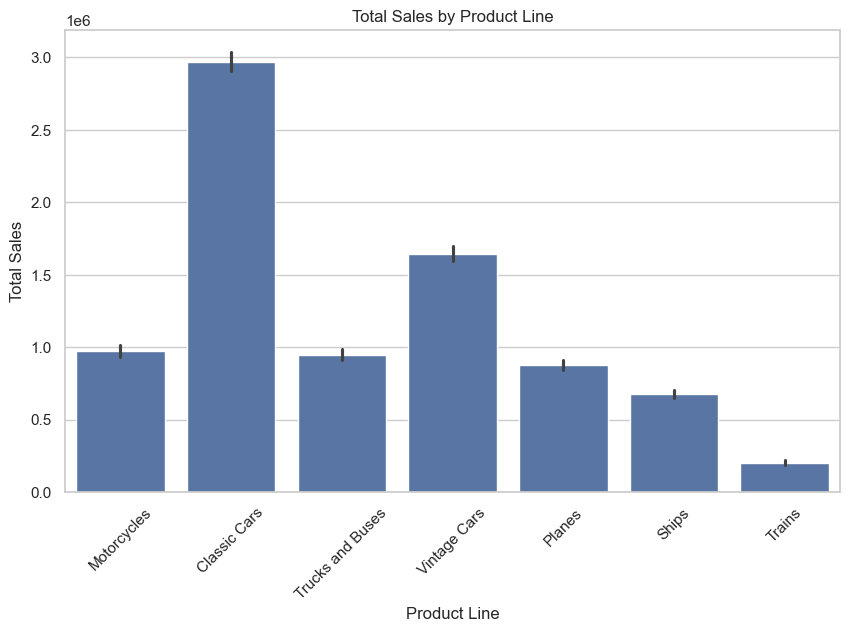

In [54]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(x='productline', y='sales', data=customersegm_clean, estimator='sum',)
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [55]:
customersegm_clean=customersegm_clean.to_csv('customersegm_clean.csv', index=False)